# COVID-19 Auswertung - WHO - new cases, deaths

## import libraries

In [1]:
Programm_Name = "WHO" # 04.01.2021 - Time Series Impffdaten erstellen



### Speicherorte und Dateinamen Plots

In [2]:
Laufwerk = "D:\\"
name_output_df = 'Dataframes\\data_WHO_data.csv'

pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"
name_performance = 'Dataframes\\df_performance.csv'

name_1_1 = "plot_1-1_cases_absolute numbers.png" # cases absoulte zahlen EU
name_1_2 = "plot_1-2_cases.png" # cases pro 100.000 Einwohner EU 
name_2 = "plot_2_intensiv.png" # intensiv Deutschland
name_2_2 = "plot_2_2_intensiv_gesamt.png" # intensiv Deutschland covid und nicht covid
name_2_3 = "plot_2_3_intensiv_covid-19.png" # intensiv Deutschland covid
name_3_1 = "plot_3-1_deaths_absolute numbers.png" # deaths absolute zahlen EU
name_3_2 = "plot_3-2_deaths.png" # deaths pro 100.000 Einwohner EU
name_4_1 = "plot_4-1_cases_ger.png" # cases Deutschland
name_4_2 = "plot_4-2_deaths_ger.png" # deaths Deutschland
name_5_1 = "plot_5-1_cases_est_ger"
name_5_2 = "plot_5-2_deaths_est_ger"

In [3]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
# import matplotlib.ticker as ticker
import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter
import numpy as np

# performance
import datetime
from datetime import datetime, timedelta
from datetime import date # todays date


#import seaborn as sns

import os
now = datetime.now()

In [4]:
# Datum einstellen 
minticks = 14
maxticks = 14

# Preprocessing Dataframes

In [5]:
today = date.today().strftime("%d.%m.%Y")

In [6]:
#Timestamp definieren  YYYY-MM-DD
#ts = pd.to_datetime('2020-10-18', utc=True)

print(datetime. today())

ts_x = str(datetime. today() - timedelta(140))
ts = pd.to_datetime(ts_x, utc=True)
print(ts)

2021-03-13 20:53:52.331909
2020-10-24 20:53:52.331909+00:00


## Datenimport

In [7]:
# Webabruf - CSV einlesen
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

## preprocessing

In [8]:
#gleitender Mittelwert der cases und deaths, 7 Tage
data['MA'] = data['New_cases'].rolling(window=7,min_periods=1).mean()
data['MA_deaths'] = data['New_deaths'].rolling(window=7, min_periods=1).mean()

data['MSTD_cases'] = data['New_cases'].rolling(window=7,min_periods=1).std()
data['MSTD_deaths'] = data['New_deaths'].rolling(window=7,min_periods=1).std()

data['OTG_cases'] = data['MA'] + data['MSTD_cases']
data['UTG_cases'] = data['MA'] - data['MSTD_cases']

data['OTG_deaths'] = data['MA_deaths'] + data['MSTD_deaths']
data['UTG_deaths'] = data['MA_deaths'] - data['MSTD_deaths']

# Date_reported in eine Datumsspalte umwandeln
data['Date_reported'] = pd.to_datetime(data.Date_reported, utc=True)


# Zeit eingrenzen
data = data.loc[data.Date_reported >= ts, :]

data = data.drop(columns=['Country_code', 'WHO_region', 'Cumulative_deaths'])

data.head(1)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,MA,MA_deaths,MSTD_cases,MSTD_deaths,OTG_cases,UTG_cases,OTG_deaths,UTG_deaths
296,2020-10-25 00:00:00+00:00,Afghanistan,81,40768,4,87.0,3.142857,79.649231,4.140393,166.649231,7.350769,7.28325,-0.997536


# Variablen für die Plots definieren

### Linien und Schriftgrößen

In [9]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25


# output größe der bilder
h = 16*1.4
v = 9
dpi = 200

 ### Bezugsgröße Einwohner

In [10]:
pE = 100_000

### Länder definieren

In [11]:
ger = data[data.Country == 'Germany']
ger = ger[ger.New_cases != 0]
fr = data[data.Country == 'France']
fr = fr[fr.New_cases != 0]
at = data[data.Country == 'Austria']
at = at[at.New_cases != 0]
pl = data[data.Country == 'Poland']
pl = pl[pl.New_cases != 0]
cz = data[data.Country == 'Czechia']
cz = cz[cz.New_cases != 0]
ch = data[data.Country == 'Switzerland']
ch = ch[ch.New_cases != 0]
it = data[data.Country == 'Italy']
it = it[it.New_cases != 0]
es = data[data.Country == 'Spain']
es = es[es.New_cases != 0]
gb = data[data.Country == 'The United Kingdom']
gb = gb[gb.New_cases != 0]

isr = data[data.Country == 'Israel']
isr = isr[isr.New_cases != 0]
se = data[data.Country == 'Sweden']
se = se[se.New_cases != 0]
usa = data[data.Country == 'United States of America']
usa = usa[usa.New_cases != 0]
spa = data[data.Country == 'Spain']
spa = spa[spa.New_cases != 0]
ita = data[data.Country == 'Italy']
ita = ita[ita.New_cases != 0]
rus = data[data.Country == 'Russian Federation']
rus = rus[rus.New_cases != 0]

est = data[data.Country == 'Estonia']
est = est[est.New_cases != 0]

In [12]:
#ger

## Länder Farben

In [13]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange

### Einwohnerzahlen

In [14]:
E_fr = 66_012_908
E_pl = 38_659_927
E_ger = 83_020_000
E_cz = 10_586_651
E_at = 8_902_600
E_ch = 8_847_020
E_gb = 66_650_000

E_isr = 8_884_000
E_usa = 328_200_000
E_rus = 144_500_000
E_ita = 60_360_000
E_spa = 46_940_000
E_se = 10_230_000

E_est = 1_329_000

In [15]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# # plt.figure(figsize=(16,9))

# plt.style.use('seaborn')


# def y_axis_thousands(x, pos):
#    # 'The two args are the value and tick position'
#     return '{:0,d}'.format(int(x)).replace(",",".")
# formatter = FuncFormatter(y_axis_thousands)


# fig = plt.figure(figsize=(h,v))
# ax = fig.add_subplot()
# ax.yaxis.set_major_formatter(formatter)
# #ax.xaxis.set_major_formatter(formatter)


# # Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

# # plt.plot(gb.Date_reported,gb['MA'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# # plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
# # plt.plot(fr.Date_reported,fr['MA'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# # plt.plot(pl.Date_reported,pl['MA'], color=c_pl, linestyle = 'dashed', linewidth = lws, label="Polen")
# # plt.plot(cz.Date_reported,cz['MA'], color=c_cz, linestyle = 'dashed', linewidth = lws, label="Tschechien")
# # plt.plot(ch.Date_reported,ch['MA'], color=c_ch, linestyle = 'dashed', linewidth = lws, label="Schweiz")
# # plt.plot(at.Date_reported,at['MA'], color=c_at, linestyle = 'dashed', linewidth = lws, label="Österreich")

# plt.plot(isr.Date_reported,isr['MA'], color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
# plt.plot(gb.Date_reported,gb['MA'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# plt.plot(usa.Date_reported,usa['MA'], color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
# plt.plot(se.Date_reported,se['MA'], color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
# plt.plot(fr.Date_reported,fr['MA'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
# plt.plot(at.Date_reported,at['MA'], color=c_at, linestyle = 'solid', linewidth = lws, label="Österreich")
# plt.plot(ch.Date_reported,ch['MA'], color=c_ch, linestyle = 'solid', linewidth = lws, label="Schweiz")


# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.3),
#            fancybox=True, 
#            shadow=True, 
#            ncol=3, 
#            fontsize=size)

# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 4, rotation=90)
# plt.yticks(fontsize=size -4)

# plt.ylabel('Neue Fälle', fontsize=size)
# plt.xlabel('Zeit', fontsize=size)

# plt.title('Neue Fälle pro Tag - absolute Zahlen (WHO-Daten)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output + name_1_1, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive + name_1_1, dpi = dpi, bbox_inches='tight')

# #plt.show()
# plt.close()

# Visualisierung der Plots

### 1-1) Neue Fälle 7 Tage Mittelwert (absolute Zahlen)

In [16]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# # plt.figure(figsize=(16,9))

# plt.style.use('seaborn')


# def y_axis_thousands(x, pos):
#    # 'The two args are the value and tick position'
#     return '{:0,d}'.format(int(x)).replace(",",".")
# formatter = FuncFormatter(y_axis_thousands)


# fig = plt.figure(figsize=(h,v))
# ax = fig.add_subplot()
# ax.yaxis.set_major_formatter(formatter)



# # Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

# # plt.plot(gb.Date_reported,gb['MA'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# # plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
# # plt.plot(fr.Date_reported,fr['MA'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# # plt.plot(pl.Date_reported,pl['MA'], color=c_pl, linestyle = 'dashed', linewidth = lws, label="Polen")
# # plt.plot(cz.Date_reported,cz['MA'], color=c_cz, linestyle = 'dashed', linewidth = lws, label="Tschechien")
# # plt.plot(ch.Date_reported,ch['MA'], color=c_ch, linestyle = 'dashed', linewidth = lws, label="Schweiz")
# # plt.plot(at.Date_reported,at['MA'], color=c_at, linestyle = 'dashed', linewidth = lws, label="Österreich")

# plt.plot(isr.Date_reported,isr['MA'], color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
# plt.plot(gb.Date_reported,gb['MA'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# plt.plot(usa.Date_reported,usa['MA'], color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
# plt.plot(se.Date_reported,se['MA'], color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
# plt.plot(fr.Date_reported,fr['MA'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
# plt.plot(at.Date_reported,at['MA'], color=c_at, linestyle = 'solid', linewidth = lws, label="Österreich")
# plt.plot(ch.Date_reported,ch['MA'], color=c_ch, linestyle = 'solid', linewidth = lws, label="Schweiz")


# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.3),
#            fancybox=True, 
#            shadow=True, 
#            ncol=3, 
#            fontsize=size)

# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation=90)
# plt.yticks(fontsize=size -4)

# plt.ylabel('Neue Fälle', fontsize=size)
# plt.xlabel('Zeit', fontsize=size)

# plt.title('Neue Fälle pro Tag - absolute Zahlen (WHO-Daten)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output + name_1_1, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive + name_1_1, dpi = dpi, bbox_inches='tight')

# plt.close()

### 1-2) Neue Fälle 7 Tage Mittelwert (pro 100.000 Einwohner)

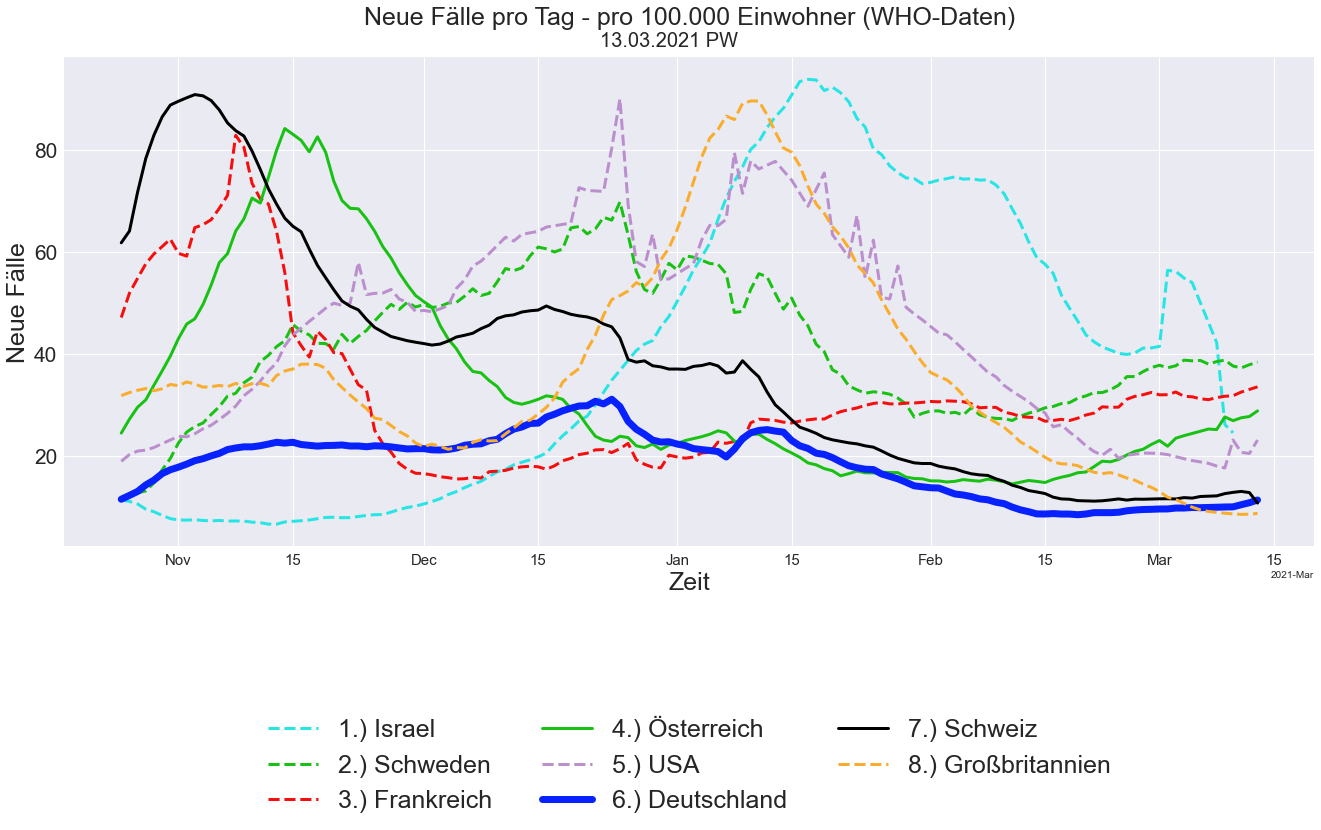

In [17]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(h,v))

plt.style.use('seaborn')


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

#plt.plot(cz.Date_reported,cz['MA']* (pE/E_cz), color=c_cz, linestyle = 'dashed', linewidth = lws, label="Tschechien")
# plt.plot(gb.Date_reported,gb['MA']* (pE/E_gb), color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# plt.plot(usa.Date_reported,usa['MA']* (pE/E_usa), color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
# plt.plot(isr.Date_reported,isr['MA']* (pE/E_isr), color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
# plt.plot(se.Date_reported,se['MA']* (pE/E_se), color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
# plt.plot(fr.Date_reported,fr['MA']* (pE/E_fr), color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")

fig, ax = plt.subplots(figsize=(h, v))

ax1=plt.plot(isr.Date_reported,isr['MA']* (pE/E_isr), color=c_isr, linestyle = 'dashed', linewidth = lws, label="1.) Israel")
ax2=plt.plot(se.Date_reported,se['MA']* (pE/E_se), color=c_se, linestyle = 'dashed', linewidth = lws, label="2.) Schweden")
ax3=plt.plot(fr.Date_reported,fr['MA']* (pE/E_fr), color=c_fr, linestyle = 'dashed', linewidth = lws, label="3.) Frankreich")
ax6=plt.plot(at.Date_reported,at['MA']* (pE/E_at), color=c_at, linestyle = 'solid', linewidth = lws, label="4.) Österreich")
ax4=plt.plot(usa.Date_reported,usa['MA']* (pE/E_usa), color=c_usa, linestyle = 'dashed', linewidth = lws, label="5.) USA")
ax8=plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label="6.) Deutschland")
ax7=plt.plot(ch.Date_reported,ch['MA']* (pE/E_ch), color=c_ch, linestyle = 'solid', linewidth = lws, label="7.) Schweiz")
ax5=plt.plot(gb.Date_reported,gb['MA']* (pE/E_gb), color=c_gb, linestyle = 'dashed', linewidth = lws, label="8.) Großbritannien")


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation=0)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Neue Fälle pro Tag - pro 100.000 Einwohner (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)


# date_form = DateFormatter("%Y-%m")
# ax.xaxis.set_major_formatter(date_form)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output +  name_1_2, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive +   name_1_2, dpi = dpi, bbox_inches='tight')

plt.show()

###  3-1) Todesfälle 7 Tage Mittelwert (absolute Zahlen) 

In [18]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# # plt.figure(figsize=(16,9))



# def y_axis_thousands(x, pos):
#    # 'The two args are the value and tick position'
#     return '{:0,d}'.format(int(x)).replace(",",".")
# formatter = FuncFormatter(y_axis_thousands)


# fig = plt.figure(figsize=(h,v))
# ax = fig.add_subplot()
# ax.yaxis.set_major_formatter(formatter)

# plt.style.use('seaborn')
# plt.grid(True)

# # Todesfälle pro 100.000 Einwohner 02.12.2020
# # plt.plot(ger.Date_reported,ger['MA_deaths'], color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland") # blau, linie, dick
# # plt.plot(gb.Date_reported,gb['MA_deaths'], color=c_gb, linestyle = 'dashed', linewidth = lws, label = "Großbritannien") # gelb, gestrichelt, dünn
# # plt.plot(fr.Date_reported,fr['MA_deaths'], color=c_fr, linestyle = 'dashed', linewidth = lws, label = "Frankreich") # rot, gestrichelt, dünn
# # plt.plot(pl.Date_reported,pl['MA_deaths'], color=c_pl, linestyle = 'dashed', linewidth = lws, label = "Polen") # cyan, gestrichelt, dünn
# # plt.plot(cz.Date_reported,cz['MA_deaths'], color=c_cz, linestyle = 'dashed', linewidth = lws, label = "Tschechien") # magenta, gestrichelt, dünn
# # plt.plot(at.Date_reported,at['MA_deaths'], color=c_at, linestyle = 'dashed', linewidth = lws, label = "Österreich") # grün, gestrichelt, dünn
# # plt.plot(ch.Date_reported,ch['MA_deaths'], color=c_ch, linestyle = 'dashed', linewidth = lws, label = "Schweiz") # schwarz, gestrichelt, dünn
# # plt.plot(isr.Date_reported,isr['MA_deaths'], color=c_isr, linestyle = 'dashed', linewidth = lws, label = "Israel") # schwarz, gestrichelt, dünn


# plt.plot(gb.Date_reported,gb['MA_deaths'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# plt.plot(ger.Date_reported,ger['MA_deaths'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
# plt.plot(usa.Date_reported,usa['MA_deaths'], color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
# plt.plot(fr.Date_reported,fr['MA_deaths'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# plt.plot(isr.Date_reported,isr['MA_deaths'], color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
# plt.plot(se.Date_reported,se['MA_deaths'], color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
# plt.plot(at.Date_reported,at['MA_deaths'], color=c_at, linestyle = 'solid', linewidth = lws, label="Österreich")
# plt.plot(ch.Date_reported,ch['MA_deaths'], color=c_ch, linestyle = 'solid', linewidth = lws, label="Schweiz")


# # Legende 
# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.3),
#            fancybox=True, 
#            shadow=True, 
#            ncol=3, 
#            fontsize=size)

# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation = 90)
# plt.yticks(fontsize=size -4)
# plt.ylabel('Todesfälle', fontsize=size)
# plt.xlabel('Zeit', fontsize=size)

# plt.title('Todesfälle pro Tag - absolute Zahlen (WHO-Daten)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output +  name_3_1, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive + name_3_1, dpi = dpi, bbox_inches='tight')

# plt.close()

###  3-2) Todesfälle 7 Tage Mittelwert (pro 100.000 Einwohner) 

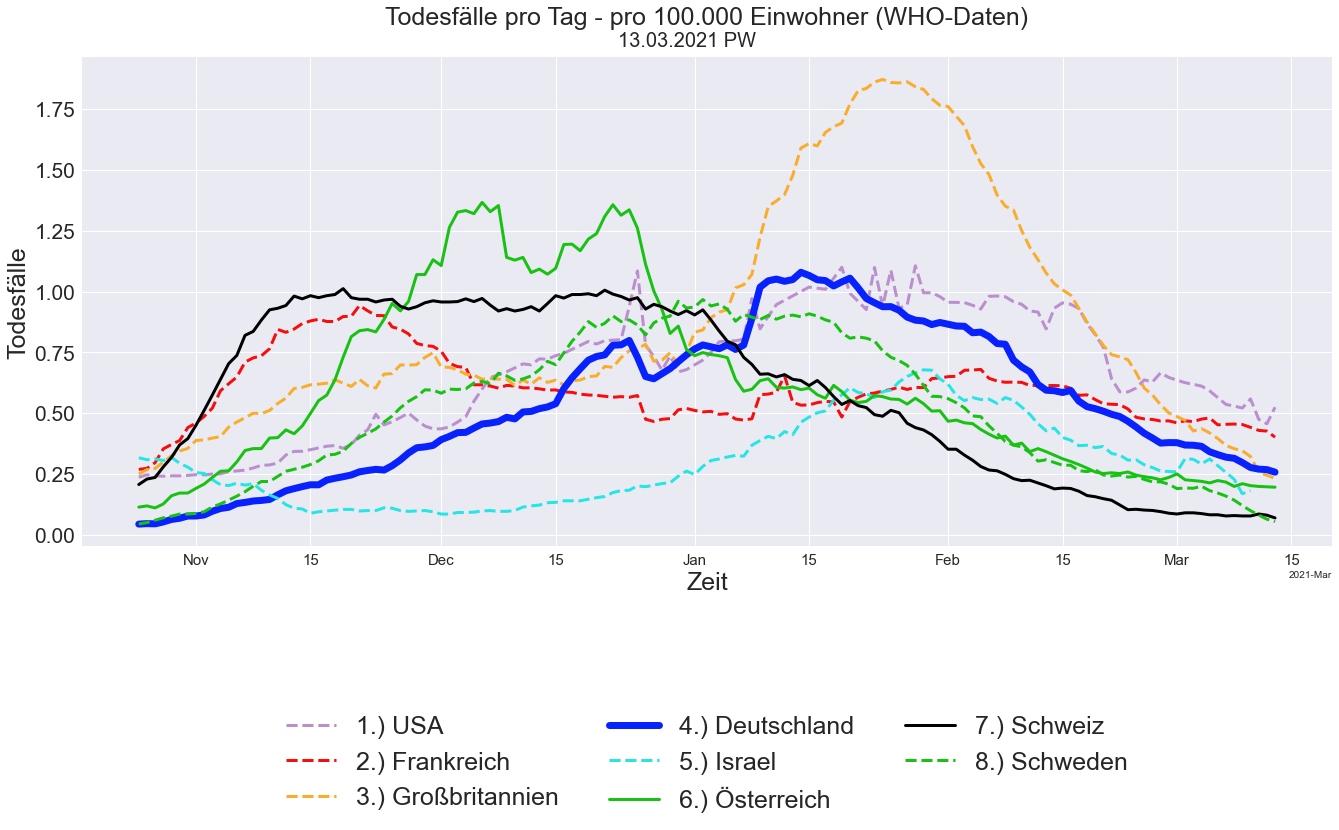

In [19]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
#plt.figure(figsize=(h,v))


# Todesfälle pro 100.000 Einwohner 02.12.2020

# plt.plot(cz.Date_reported,cz['MA_deaths'] * (pE/E_cz), color=c_cz, linestyle = 'dashed', linewidth = lws, label = "Tschechien") # magenta, gestrichelt, dünn
# plt.plot(at.Date_reported,at['MA_deaths'] * (pE/E_at), color=c_at, linestyle = 'dashed', linewidth = lws, label = "Österreich") # grün, gestrichelt, dünn
# plt.plot(gb.Date_reported,gb['MA_deaths'] * (pE/E_gb), color=c_gb, linestyle = 'dashed', linewidth = lws, label = "Großbritannien") # gelb, gestrichelt, dünn
# plt.plot(ger.Date_reported,ger['MA_deaths'] * (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland") # blau, linie, dick
# plt.plot(ch.Date_reported,ch['MA_deaths'] * (pE/E_ch), color=c_ch, linestyle = 'dashed', linewidth = lws, label = "Schweiz") # schwarz, gestrichelt, dünn
# plt.plot(pl.Date_reported,pl['MA_deaths'] * (pE/E_pl), color=c_pl, linestyle = 'dashed', linewidth = lws, label = "Polen") # cyan, gestrichelt, dünn
# plt.plot(fr.Date_reported,fr['MA_deaths'] * (pE/E_fr), color=c_fr, linestyle = 'dashed', linewidth = lws, label = "Frankreich") # rot, gestrichelt, dünn
# plt.plot(isr.Date_reported,isr['MA_deaths'] * (pE/E_isr), color=c_isr, linestyle = 'dashed', linewidth = lws, label = "Israel") # rot, gestrichelt, dünn

fig, ax = plt.subplots(figsize=(h, v))
plt.style.use('seaborn')
plt.grid(True)

ax2=plt.plot(usa.Date_reported,usa['MA_deaths']* (pE/E_usa), color=c_usa, 
             linestyle = 'dashed', linewidth = lws, label="1.) USA")
ax3=plt.plot(fr.Date_reported,fr['MA_deaths']* (pE/E_fr), color=c_fr, 
             linestyle = 'dashed', linewidth = lws, label="2.) Frankreich")
ax1=plt.plot(gb.Date_reported,gb['MA_deaths']* (pE/E_gb), color=c_gb, 
             linestyle = 'dashed', linewidth = lws, label="3.) Großbritannien")
ax4=plt.plot(ger.Date_reported,ger['MA_deaths']* (pE/E_ger), color=c_ger, 
             linestyle = 'solid', linewidth = lwb, label="4.) Deutschland")
ax5=plt.plot(isr.Date_reported,isr['MA_deaths']* (pE/E_isr), color=c_isr, 
             linestyle = 'dashed', linewidth = lws, label="5.) Israel")
ax6=plt.plot(at.Date_reported,at['MA_deaths']* (pE/E_at), color=c_at, 
             linestyle = 'solid', linewidth = lws, label="6.) Österreich")
ax7=plt.plot(ch.Date_reported,ch['MA_deaths']* (pE/E_ch), color=c_ch, 
             linestyle = 'solid', linewidth = lws, label="7.) Schweiz")
ax8=plt.plot(se.Date_reported,se['MA_deaths']* (pE/E_se), color=c_se, 
             linestyle = 'dashed', linewidth = lws, label="8.) Schweden")


# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 0)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Todesfälle pro Tag - pro 100.000 Einwohner (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_3_2, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive +  name_3_2, dpi = dpi, bbox_inches='tight')

plt.show()

In [20]:
# ts = pd.to_datetime('2021-01-11', utc=True)
# ger_change = ger_change.loc[ger_change.Date_reported >= ts, :]
# ger_change.head(10)

In [21]:
ts = pd.to_datetime('2021-01-15', utc=True)   # YYYY-MM-DD

#dataframe reduzieren 
ger_change = data[data.Country == 'Germany']
ger_change = ger_change.loc[ger_change.Date_reported >= ts, :]

ger_change = ger_change.drop(columns=['Cumulative_cases', 
                                      'New_deaths', 'MA_deaths', 
                                      'MSTD_cases', 'MSTD_deaths', 
                                      'OTG_cases', 'UTG_cases', 
                                      'OTG_deaths', 'UTG_deaths'])



ger_change["change_1"] = 100 * ger_change["MA"].pct_change(periods=1)
ger_change["change_1_MW"] = ger_change["change_1"].rolling(window=3, min_periods=1, center=True).mean()

ger_change["MSTD"] = ger_change["change_1"].rolling(window=7,min_periods=1).std()

# ger_change["change_1_MW_std+"] = ger_change["change_1_MW"] + 
# ger_change["change_1_MW_std-"] = 


# ger_change["change_4"] = 100 * ger_change["MA"].pct_change(periods=4)
# ger_change["change_7"] = 100 * ger_change["MA"].pct_change(periods=7)
# ger_change["change_14"] = 100 * ger_change["MA"].pct_change(periods=14)

ger_change["R1"] = 0


ger_change.head(10)

,Date_reported,Country,New_cases,MA,change_1,change_1_MW,MSTD,R1
34386,2021-01-15 00:00:00+00:00,Germany,22368,19153.000000,NaN,-4.487175,NaN,0
34387,2021-01-16 00:00:00+00:00,Germany,18678,18293.571429,-4.487175,-3.439948,NaN,0
34388,2021-01-17 00:00:00+00:00,Germany,13882,17855.857143,-2.392722,-3.721668,1.481002,0
34389,2021-01-18 00:00:00+00:00,Germany,7141,17090.714286,-4.285109,-2.625213,1.155328,0
34390,2021-01-19 00:00:00+00:00,Germany,11369,16886.000000,-1.197810,-2.850183,1.575538,0
34391,2021-01-20 00:00:00+00:00,Germany,15974,16368.000000,-3.067630,-2.808375,1.364495,0
34392,2021-01-21 00:00:00+00:00,Germany,20398,15687.142857,-4.159684,-3.776922,1.296757,0
34393,2021-01-22 00:00:00+00:00,Germany,17862,15043.428571,-4.103451,-3.470084,1.225454,0
34394,2021-01-23 00:00:00+00:00,Germany,16417,14720.428571,-2.147117,-2.609193,1.193369,0
34395,2021-01-24 00:00:00+00:00,Germany,12257,14488.285714,-1.577012,-1.376789,1.303088,0


In [22]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# # plt.figure(figsize=(h*1.4,v))

# # def y_axis_thousands(x, pos):
# #    # 'The two args are the value and tick position'
# #     return '{:0,d}'.format(int(x)).replace(",",".")
# # formatter = FuncFormatter(y_axis_thousands)

# fig, ax = plt.subplots(figsize=(h, v))

# # ax.yaxis.set_major_formatter(formatter)


# # # Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 
# ax1 = plt.plot(ger_change.Date_reported,ger_change['change_1'], color="black", linestyle = '',
#                marker='.', markersize = size,
#                label = "Änderung: 1 Tag")

# # ax2 = plt.plot(ger_change.Date_reported,ger_change['change_4'], color="black", linestyle = 'solid', linewidth = lws, 
# #                label = "Änderung: 4 Tage")

# # ax3 = plt.plot(ger_change.Date_reported,ger_change['change_7'], color="black", linestyle = 'solid', linewidth = lws, 
# #                label = "Änderung: 7 Tage")

# # ax4 = plt.plot(ger_change.Date_reported,ger_change['change_14'], color="blue", linestyle = 'solid', linewidth = lws, 
# #                label = "Änderung: 14 Tage")

# ax5 = plt.plot(ger_change.Date_reported,ger_change['R1'], color="red", linestyle = 'dashed', linewidth = lws, 
#                label = "Keine Änderung")


# ax6 = plt.plot(ger_change.Date_reported,ger_change['change_1_MW'], color="blue", linestyle = '--', linewidth = lws, 
#                label = "Änderung: 1 Tag MW")


# # fill area between lines
# plt.fill_between(ger_change.Date_reported, ger_change['change_1_MW'], ger_change['R1'] , 
#                  color='green',alpha=0.5, interpolate=True, where = ger_change['change_1_MW'] < 0 )

# plt.fill_between(ger_change.Date_reported, ger_change['change_1_MW'], ger_change['R1'] , 
#                  color='red',alpha=0.5, interpolate=True, where = ger_change['change_1_MW'] > 0 )



# # ax7 = plt.plot(ger_change.Date_reported,ger_change['change_1_MW7'], color="black", linestyle = '--', linewidth = lws, 
# #                label = "Änderung: 1 Tag MW")


# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.3),
#            fancybox=True, 
#            shadow=True, 
#            ncol=3, 
#            fontsize=size)

# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation = 0)
# plt.yticks(fontsize=size -4)

# plt.ylabel('Änderungsrate Neuinfektionen [%]', fontsize=size)
# plt.xlabel('Zeit', fontsize=size)

# plt.title('Änderungsrate Neuinfektionen [%] (WHO-Daten)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)




# # ax.set_ylim(ymin=0)

# # ax.set_ylim(ymin=-30)
# # ax.set_ylim(ymax=30)

# locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
# formatter = mdates.ConciseDateFormatter(locator)
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)


# # Diagramm als Bild exporieren und Auflösung definieren
# # plt.savefig(Laufwerk + pfad_output +  name_4_1, dpi = dpi, bbox_inches='tight')
# # plt.savefig(Laufwerk + pfad_onedrive +  name_4_1, dpi = dpi, bbox_inches='tight')

# plt.show()
# # plt.close()

###  4-1) Cases 7 Tage Mittelwert Deutschland

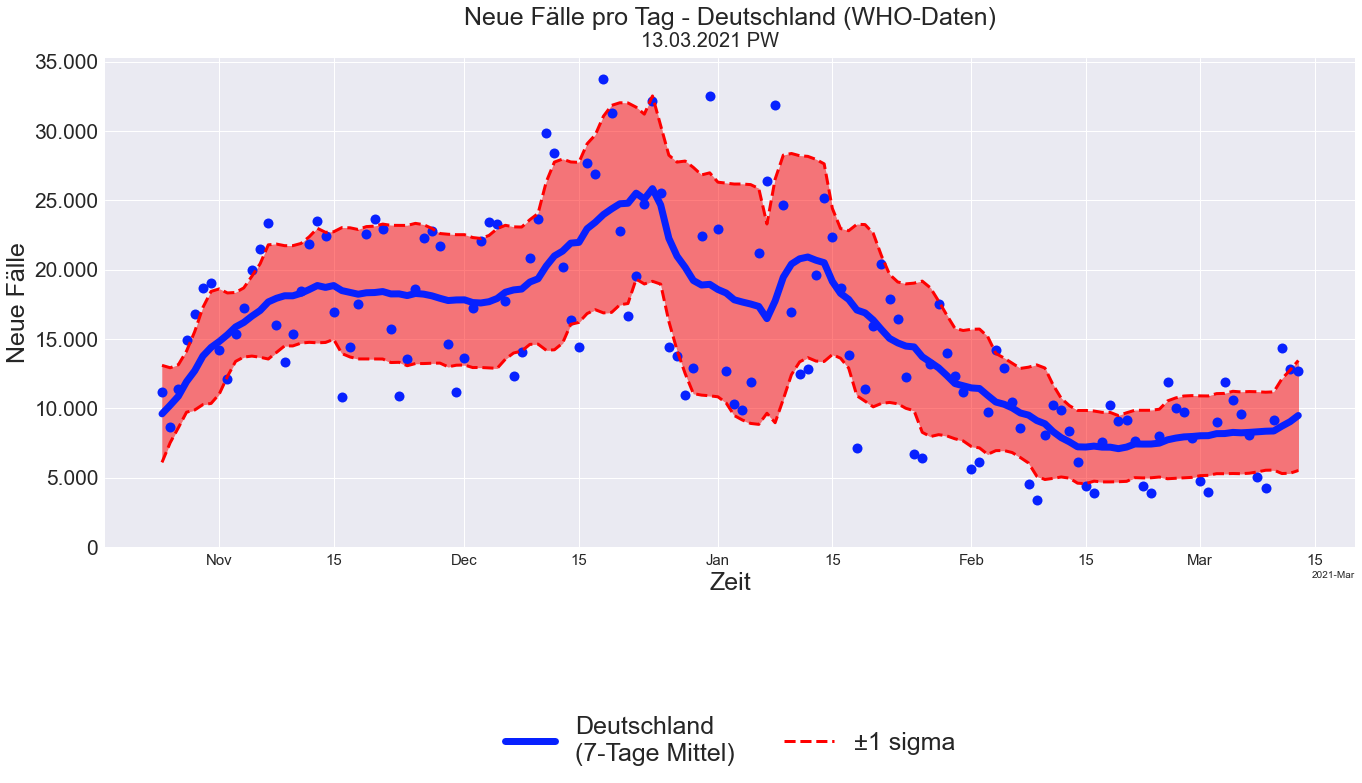

In [23]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(h*1.4,v))

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)

fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 
ax1 = plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland\n(7-Tage Mittel)")
ax2 = plt.plot(ger.Date_reported,ger['New_cases'], marker='.', linestyle='', color=c_ger, markersize = 20)
ax3 = plt.plot(ger.Date_reported,ger['OTG_cases'], color='red', linestyle = 'dashed', linewidth = lws, label ="±1 sigma")
ax4 = plt.plot(ger.Date_reported,ger['UTG_cases'], color='red', linestyle = 'dashed', linewidth = lws, label ="")

plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 0)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Neue Fälle pro Tag - Deutschland (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# fill area between lines
plt.fill_between(ger.Date_reported, ger['OTG_cases'], ger['UTG_cases'] , color='red',alpha=0.5)

ax.set_ylim(ymin=0)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)


# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output +  name_4_1, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive +  name_4_1, dpi = dpi, bbox_inches='tight')

plt.show()
# plt.close()

###  4-2) Deaths 7 Tage Mittelwert Deutschland

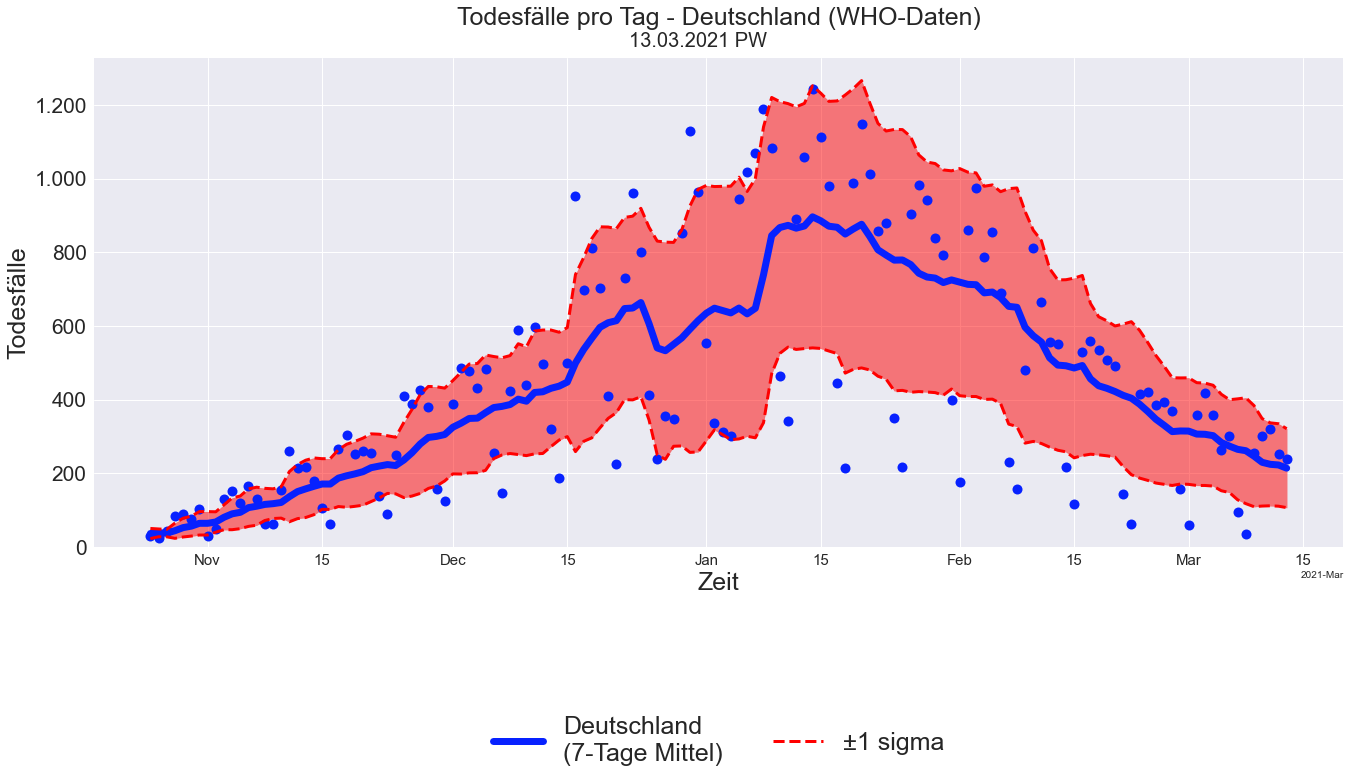

In [24]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
#plt.figure(figsize=(16,9))




def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)



ffig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)
plt.style.use('seaborn')
plt.grid(True)
# Todesfälle pro 100.000 Einwohner 02.12.2020

ax1 = plt.plot(ger.Date_reported,ger['MA_deaths'], color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland\n(7-Tage Mittel)") # blau, linie, dick
ax2 = plt.plot(ger.Date_reported,ger['New_deaths'], marker='.', linestyle='', color=c_ger, markersize = 20)

ax3 = plt.plot(ger.Date_reported,ger['OTG_deaths'], color='red', linestyle = 'dashed', linewidth = lws, label ="±1 sigma")
ax4 = plt.plot(ger.Date_reported,ger['UTG_deaths'], color='red', linestyle = 'dashed', linewidth = lws, label ="")

ax.set_ylim(ymin=0)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 0)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Todesfälle pro Tag - Deutschland (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# fill area between lines
plt.fill_between(ger.Date_reported, ger['OTG_deaths'], ger['UTG_deaths'] , color='red',alpha=0.5)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output +  name_4_2, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive +  name_4_2, dpi = dpi, bbox_inches='tight')

plt.show()
# plt.close()

### 5-1) Neue Fälle 7 Tage Mittelwert (pro 100.000 Einwohner) EST GER

In [25]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(h,v))

# plt.style.use('seaborn')

# plt.plot(est.Date_reported,est['MA']* (pE/E_est), color=c_isr, linestyle = 'dashed', linewidth = lws, label="Estonia")
# plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label="Germany")

# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.3),
#            fancybox=True, 
#            shadow=True, 
#            ncol=3, 
#            fontsize=size)


# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation=90)
# plt.yticks(fontsize=size -4)

# plt.ylabel('New Cases', fontsize=size)
# plt.xlabel('Time', fontsize=size)

# plt.title('Covid-19 - New cases per day - pro 100.000 inhabitants (WHO-Data)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output +  name_5_1, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive +   name_5_1, dpi = dpi, bbox_inches='tight')

# plt.close()

###  5-2) Todesfälle 7 Tage Mittelwert (pro 100.000 Einwohner) EST GER 

In [26]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(h,v))

# plt.style.use('seaborn')
# plt.grid(True)

# # Todesfälle pro 100.000 Einwohner 02.12.2020

# # plt.plot(cz.Date_reported,cz['MA_deaths'] * (pE/E_cz), color=c_cz, linestyle = 'dashed', linewidth = lws, label = "Tschechien") # magenta, gestrichelt, dünn
# # plt.plot(at.Date_reported,at['MA_deaths'] * (pE/E_at), color=c_at, linestyle = 'dashed', linewidth = lws, label = "Österreich") # grün, gestrichelt, dünn
# # plt.plot(gb.Date_reported,gb['MA_deaths'] * (pE/E_gb), color=c_gb, linestyle = 'dashed', linewidth = lws, label = "Großbritannien") # gelb, gestrichelt, dünn
# # plt.plot(ger.Date_reported,ger['MA_deaths'] * (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland") # blau, linie, dick
# # plt.plot(ch.Date_reported,ch['MA_deaths'] * (pE/E_ch), color=c_ch, linestyle = 'dashed', linewidth = lws, label = "Schweiz") # schwarz, gestrichelt, dünn
# # plt.plot(pl.Date_reported,pl['MA_deaths'] * (pE/E_pl), color=c_pl, linestyle = 'dashed', linewidth = lws, label = "Polen") # cyan, gestrichelt, dünn
# # plt.plot(fr.Date_reported,fr['MA_deaths'] * (pE/E_fr), color=c_fr, linestyle = 'dashed', linewidth = lws, label = "Frankreich") # rot, gestrichelt, dünn
# # plt.plot(isr.Date_reported,isr['MA_deaths'] * (pE/E_isr), color=c_isr, linestyle = 'dashed', linewidth = lws, label = "Israel") # rot, gestrichelt, dünn


# plt.plot(ger.Date_reported,ger['MA_deaths']* (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label="Germany")
# plt.plot(est.Date_reported,est['MA_deaths']* (pE/E_est), color=c_isr, linestyle = 'solid', linewidth = lwb, label="Estonia")


# # Legende 
# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.3),
#            fancybox=True, 
#            shadow=True, 
#            ncol=3, 
#            fontsize=size)

# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation = 90)
# plt.yticks(fontsize=size -4)
# plt.ylabel('Deaths', fontsize=size)
# plt.xlabel('Time', fontsize=size)

# plt.title('Covid-19 - Deaths per day - per 100.000 inhabitants (WHO-Data)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output + name_5_2, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive +  name_5_2, dpi = dpi, bbox_inches='tight')

# plt.close()

## dataframes speichern

In [27]:
data.to_csv(Laufwerk + pfad_output + name_output_df, index=False)

ger.to_csv(Laufwerk + pfad_output + "\\Dataframes\\ger.csv", index=False)
fr.to_csv(Laufwerk + pfad_output + "\\Dataframes\\fr.csv", index=False)
at.to_csv(Laufwerk + pfad_output + "\\Dataframes\\at.csv", index=False)
pl.to_csv(Laufwerk + pfad_output + "\\Dataframes\\pl.csv", index=False)
cz.to_csv(Laufwerk + pfad_output + "\\Dataframes\\cz.csv", index=False)
ch.to_csv(Laufwerk + pfad_output + "\\Dataframes\\ch.csv", index=False)
it.to_csv(Laufwerk + pfad_output + "\\Dataframes\\it.csv", index=False)
es.to_csv(Laufwerk + pfad_output + "\\Dataframes\\es.csv", index=False)
gb.to_csv(Laufwerk + pfad_output + "\\Dataframes\\gb.csv", index=False)
isr.to_csv(Laufwerk + pfad_output + "\\Dataframes\\isr.csv", index=False)
se.to_csv(Laufwerk + pfad_output + "\\Dataframes\\se.csv", index=False)
usa.to_csv(Laufwerk + pfad_output + "\\Dataframes\\usa.csv", index=False)
spa.to_csv(Laufwerk + pfad_output + "\\Dataframes\\spa.csv", index=False)
ita.to_csv(Laufwerk + pfad_output + "\\Dataframes\\ita.csv", index=False)
rus.to_csv(Laufwerk + pfad_output + "\\Dataframes\\rus.csv", index=False)


## Performance messen

In [28]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

# Performance CSV einlesen
d = pd.read_csv(Laufwerk + pfad_output + name_performance)

# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x],
      'Version': [Programm_Name]}

# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)

# Datenexport Performance
d.to_csv(Laufwerk + pfad_output + name_performance, index=False)

print(f'performance {pc} = {x} seconds')

performance DOUG = 6.81 seconds
